In [8]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Assignment 01 NLP
# GROUP 2

## 1. Look at Continuous bag of word and GloVe method


## 2.   Compare and contrast GloVe vs skip-gram

## • Looking at Continuous bag of word and GloVe method

###              • Continuous bag of word method

CBOW predicts the probability of a word to occur given the words surrounding it. We can consider a single word or a group of words. But for simplicity, we will take a single context word and try to predict a single target word.

The English language contains almost 1.2 million words, making it impossible to include so many words in our example. So if we consider a small example in which we have only four words i.e. live, home, they and at. For simplicity, we will consider that the corpus contains only one sentence, that being, ‘They live at home’.

First, we convert each word into a one-hot encoding form. Also, we’ll not consider all the words in the sentence but ll only take certain words that are in a window. For example for a window size equal to three, we only consider three words in a sentence. The middle word is to be predicted and the surrounding two words are fed into the neural network as context. The window is then slid and the process is repeated again.

Finally, after training the network repeatedly by sliding the window as shown, we get weights which we use to get the embeddings

### •  GloVe method

GloVe (Global Vectors for Word Representation) is an alternate method to create word embeddings. It is based on matrix factorization techniques on the word-context matrix. A large matrix of co-occurrence information is constructed and you count each “word” (the rows), and how frequently we see this word in some “context” (the columns) in a large corpus. Usually, we scan our corpus in the following manner: for each term, we look for context terms within some area defined by a window-size before the term and a window-size after the term. Also, we give less weight for more distant words.

The number of “contexts” is, of course, large, since it is essentially combinatorial in size. So then we factorize this matrix to yield a lower-dimensional matrix, where each row now yields a vector representation for each word. In general, this is done by minimizing a “reconstruction loss”. This loss tries to find the lower-dimensional representations which can explain most of the variance in the high-dimensional data.

 ## • Comparison and contrast: GloVe vs skip-gram

#### Skip-gram:

Advantages:

    The idea is very intuitive, which transforms the unlabled raw corpus into labeled data 
    (by mapping the target word to its context word), and learns the representation 
    of words in a classification task.
    The data can be fed into the model in an online way and needs little preprocessing, 
    thus requires little memory.
    The mapping between the target word to its context word implicitly embeds the sub-linear relationship
    into the vector space of words, so that relationships like “king:man as queen:woman” can be infered by word vectors.
    It is simple for a freshman to understand the principle and do implementation.

Disadvantages:

    The sub-linear relationships are not explicitly defined. There is little theoretical support behind such characteristic.

    The model could be very difficult to train if use the softmax function, since the number 
    of categories is too large (the size of vocabulary). Though approxination algorithms 
    like negative sampling (NEG) and hierarchical softmax (HS) are proposed to address 
    the issue, other problems happen. For example, the word vectors by NEG are not distributed
    uniformally, they are located within a cone in the vector space hence the vector space is not sufficiently utilized.

### Glove:

Advantages:

    The goal of Glove is very straightforward, i.e., to enforce the word vectors to capture 
    sub-linear relationships in the vector space. Thus, it proves to perform better 
    than skip-gram in the word analogoy tasks.
    Glove adds some more practical meaning into word vectors by considering the relationships
    between word pair and word pair rather than word and word.
    Glove gives 
    lower weight for highly frequent word pairs so as to prevent the meaningless 
    stop words like “the”, “an” will not dominate the training progress.

Disadvantages:

    The model is trained on the co-occurrence matrix of words, which takes a lot of memory for storage. 
    Especially, if you change the hyper-parameters related to the co-occurrence matrix, you have to reconstruct 
    the matrix again, which is very time-consuming.

### Both skip-gram and Glove do not solve the problems like:

    How to learn the representation for out-of-vocabulary words.
    How to separate some opposite word pairs. For example, “good” and “bad” are usually located very close to each other 
    in the vector space, which may limit the performance of word vectors in NLP tasks like sentiment analysis.

# 3 Extend the Wikipedia exercise

## • Implement a window based SVD model and visualize some example relationships

## • Compare the performance of SVD based embedding to word2vec

In [56]:
import nltk
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize as sent
from nltk.tokenize import RegexpTokenizer
from sklearn.decomposition import TruncatedSVD,PCA


from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

from nltk import bigrams
import itertools

import bs4 as bs
import urllib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [57]:
# link to the wikipedia of the president Senegalvectorized_words
raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Macky_Sall')  
raw_html = raw_html.read()

wiki_html = bs.BeautifulSoup(raw_html, 'lxml')
article_paragraphs = wiki_html.find_all('p')
article_text = ''
for para in article_paragraphs:  
    article_text += para.text


## **Text Preprocessing**

In [58]:
#remove punctuations
pattern = r'[0-9([\]%),\"\-\_–$;:\']'
new_string = (re.sub(pattern, '', article_text)).lower()

print(new_string)


macky sall born  december  is a senegalese politician who has been president of senegal since april . he was reelected president in the first round voting in february  senegalese presidential election. under president abdoulaye wade sall was prime minister of senegal from july  to june  and president of the national assembly from june  to november . he was the mayor of fatick from  to  and held that post again from  to .
sall was a longtime member of the senegalese democratic party pds. after coming into conflict with wade he was removed from his post as president of the national assembly in november  he consequently founded his own party named apr and joined the opposition. placing second in the first round of the  presidential election he won the backing of other opposition candidates and prevailed over wade in the second round of voting held on  march . he is the first president born after senegalese independence from france.
sall was one of five children born to amadou abdoul sall

In [59]:
len(article_text)

14823

In [60]:
#remove stopwords
text_tokens = word_tokenize(new_string)

tokens_without_sw = (" ").join([word for word in text_tokens if not word in stopwords.words()])

print(tokens_without_sw)

macky sall born december senegalese politician president senegal since april . reelected president first round voting february senegalese presidential election . president abdoulaye wade sall prime minister senegal july june president national assembly june november . mayor fatick held post . sall longtime member senegalese democratic party pds . coming conflict wade removed post president national assembly november consequently founded party named apr joined opposition . placing second first round presidential election backing opposition candidates prevailed wade second round voting held march . first president born senegalese independence france . sall five children born amadou abdoul sall state worker caretaker coumba thimbo peanut seller . raised fatick futa tooro well mboro age . salls father member socialist party senegal ps high school kaolack sall associated maoists encouragement brotherinlaw . studies university dakar involved marxistleninist movement andjëf led landing savané

In [61]:
len(tokens_without_sw)

10147

In [62]:
#tokenize
tokenizer = RegexpTokenizer(r'\w+')
tokens=tokenizer.tokenize(tokens_without_sw)
print(tokens)

['macky', 'sall', 'born', 'december', 'senegalese', 'politician', 'president', 'senegal', 'since', 'april', 'reelected', 'president', 'first', 'round', 'voting', 'february', 'senegalese', 'presidential', 'election', 'president', 'abdoulaye', 'wade', 'sall', 'prime', 'minister', 'senegal', 'july', 'june', 'president', 'national', 'assembly', 'june', 'november', 'mayor', 'fatick', 'held', 'post', 'sall', 'longtime', 'member', 'senegalese', 'democratic', 'party', 'pds', 'coming', 'conflict', 'wade', 'removed', 'post', 'president', 'national', 'assembly', 'november', 'consequently', 'founded', 'party', 'named', 'apr', 'joined', 'opposition', 'placing', 'second', 'first', 'round', 'presidential', 'election', 'backing', 'opposition', 'candidates', 'prevailed', 'wade', 'second', 'round', 'voting', 'held', 'march', 'first', 'president', 'born', 'senegalese', 'independence', 'france', 'sall', 'five', 'children', 'born', 'amadou', 'abdoul', 'sall', 'state', 'worker', 'caretaker', 'coumba', 'thim

In [63]:
len(tokens),len(set(tokens))

(1267, 705)

In [86]:
data=tokens[:150]  # We take the 150 first words to plot them 
data

['macky',
 'sall',
 'born',
 'december',
 'senegalese',
 'politician',
 'president',
 'senegal',
 'since',
 'april',
 'reelected',
 'president',
 'first',
 'round',
 'voting',
 'february',
 'senegalese',
 'presidential',
 'election',
 'president',
 'abdoulaye',
 'wade',
 'sall',
 'prime',
 'minister',
 'senegal',
 'july',
 'june',
 'president',
 'national',
 'assembly',
 'june',
 'november',
 'mayor',
 'fatick',
 'held',
 'post',
 'sall',
 'longtime',
 'member',
 'senegalese',
 'democratic',
 'party',
 'pds',
 'coming',
 'conflict',
 'wade',
 'removed',
 'post',
 'president',
 'national',
 'assembly',
 'november',
 'consequently',
 'founded',
 'party',
 'named',
 'apr',
 'joined',
 'opposition',
 'placing',
 'second',
 'first',
 'round',
 'presidential',
 'election',
 'backing',
 'opposition',
 'candidates',
 'prevailed',
 'wade',
 'second',
 'round',
 'voting',
 'held',
 'march',
 'first',
 'president',
 'born',
 'senegalese',
 'independence',
 'france',
 'sall',
 'five',
 'children',

In [87]:
vocabulary=set(data)
print(vocabulary)

{'prevailed', 'led', 'coumba', 'national', 'ideas', 'savané', 'use', 'encouragement', 'age', 'assembly', 'joined', 'presidential', 'pds', 'named', 'abdoul', 'boycott', 'removed', 'fatick', 'salls', 'apr', 'opposition', 'caretaker', 'senegalese', 'strategy', 'engineer', 'minister', 'april', 'soon', 'june', 'left', 'socialist', 'well', 'geological', 'placing', 'february', 'reelected', 'november', 'sall', 'dakar', 'post', 'thimbo', 'party', 'trained', 'wade', 'president', 'share', 'brotherinlaw', 'december', 'consequently', 'peanut', 'amadou', 'high', 'voting', 'conflict', 'abdoulaye', 'candidates', 'maoists', 'voted', 'coming', 'five', 'savanés', 'children', 'mayor', 'second', 'election', 'studies', 'july', 'involved', 'round', 'father', 'university', 'macky', 'democratic', 'landing', 'school', 'first', 'held', 'independence', 'longtime', 'mboro', 'seller', 'raised', 'worker', 'march', 'senegal', 'member', 'associated', 'politician', 'tooro', 'movement', 'ps', 'andjëf', 'liberal', 'franc

## **Word Representation**

We represent the words using count vectorizer.

In [88]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(set(data))
vectorized_words=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
vectorized_words.head()


,abdoul,abdoulaye,age,amadou,andjëf,apr,april,assembly,associated,backing,born,boycott,brotherinlaw,candidates,caretaker,children,coming,conflict,consequently,coumba,dakar,december,democratic,election,encouragement,engineer,father,fatick,february,first,five,founded,france,futa,geological,held,high,ideas,independence,involved,...,pds,peanut,placing,politician,post,president,presidential,prevailed,prime,ps,raised,reelected,removed,round,sall,salls,savané,savanés,school,second,seller,senegal,senegalese,share,since,socialist,soon,state,strategy,studies,thimbo,tooro,trained,university,use,voted,voting,wade,well,worker
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [89]:
vectorized_words.shape

(103, 103)

**SVD**

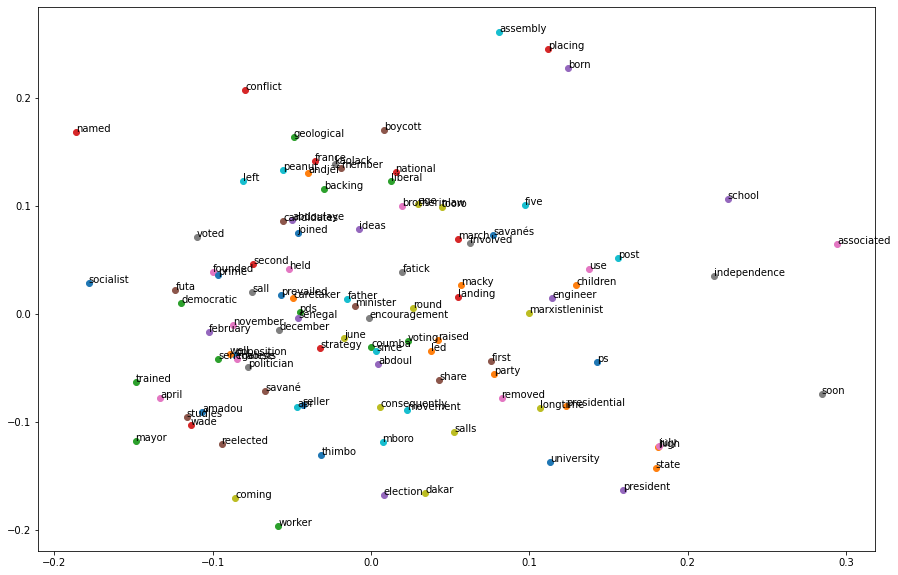

In [90]:

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(vectorized_words)

plt.figure(figsize=(15,10))
for i, txt in enumerate(set(data)):
  plt.scatter(A_transf[i,0],A_transf[i, 1])
  plt.annotate(txt,xy=(A_transf[i,0],A_transf[i, 1]))
plt.show()


In [71]:
A_transf.shape

(705, 2)

## **Word2vec**

In [16]:
from gensim.models import Word2Vec

In [28]:
tokens = [tokenizer.tokenize(s) for s in new_string.split('\n')]
w2v_model = Word2Vec(tokens,min_count=2, window=5, size=5)
w2v_model

In [32]:
w2v_model.save("word2vec.model")
w2v_model.save("model.bin")

In [48]:
model=Word2Vec.load("model.bin")
model1=Word2Vec.load("word2vec.model")

In [92]:
vocab = list(w2v_model.wv.vocab)
#vocab

In [94]:
data1=vocab[:150]# We take the 150 first words and represente them.

In [95]:
k=model1.wv[vocab]

In [96]:
model=Word2Vec(tokens)

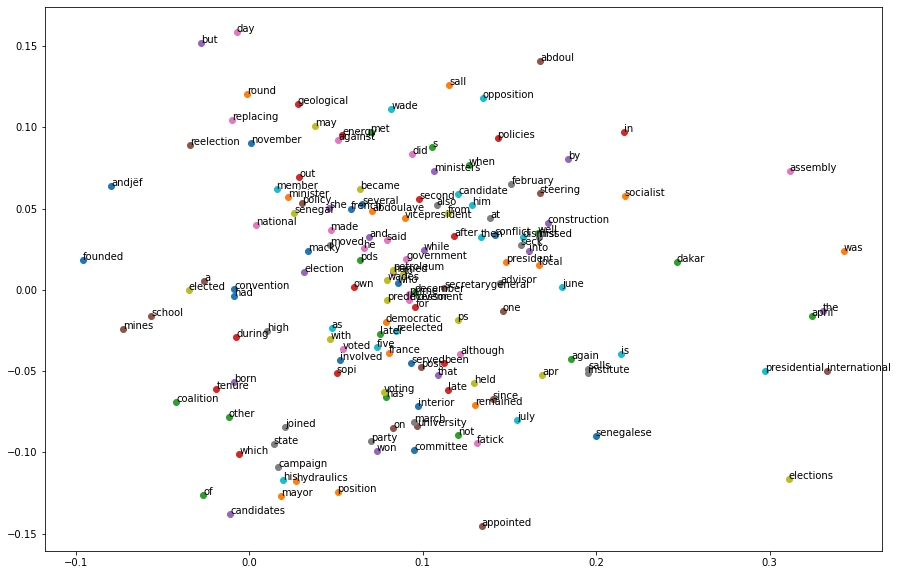

In [97]:

svd =  TruncatedSVD(n_components = 2)
A_transf = svd.fit_transform(k)

plt.figure(figsize=(15,10))
for i, txt in enumerate(set(data1)):
  plt.scatter(A_transf[i,0],A_transf[i, 1])
  plt.annotate(txt,xy=(A_transf[i,0],A_transf[i, 1]))
plt.show()


## COMPARISON
## *>SVD*
## For the SVD, we notice a better representation for some of 150 words according to the similarities between them.
## for instance, the words "macky" and "landing" are very close due to the fact they were in the same political coalition.
## In the same way, the words "president" and "state" are close due to the fact that the "president" run the "state".



## *>WORD2VEC*

## As we see in this case, using the Word2vec method, we represent a sample of 150 words from the vocabulary, we notice that it has done some good representation of some words like "macky" and "election", also "party" and "won", "mayor" and "candidates" and so on. 




# As remark, this representation is just for the 150 first words that are not necessarily linked, and for that we had used the whole vocabulary, we would have a better representation based on similarities of the words.
